In [1]:
!pip install gekko
# !pip install sympy

     |████████████████████████████████| 12.3MB 12.4MB/s 


In [2]:
### Based on Figure 6 in Bretl 2014 theory paper. Code to check that a single 
# configuration of an elastic rod, represented in coordinates by a point a is both 
# stable and collision free

import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt  

In [3]:
### Generate representation a
# a in A in R6 where (a2,a3,a5,a6) =/= (0,0,0,0)
#numpy array with random values
a = np.random.rand(6)

print(a)

[0.33713673 0.19574592 0.86078677 0.15345952 0.2346347  0.70301887]


In [4]:
## Solve for mu's
m = GEKKO()            # create GEKKO model

# define parameters
c1 = 1.0
c2 = 1.0
c3 = 1.0
t_steps = 100
m.time = np.linspace(0,1,t_steps) # t range [0,1]
t = m.Param(value=m.time)

# define variables
# initial conditions mu(0) = a
mu1 = m.Var(value=a[0])           
mu2 = m.Var(value=a[1])  
mu3 = m.Var(value=a[2])           
mu4 = m.Var(value=a[3])  
mu5 = m.Var(value=a[4])           
mu6 = m.Var(value=a[5])     

# define equations
m.Equation(mu1.dt() == (c3**-1)*mu3*mu2 - (c2**-1)*mu2*mu3)
m.Equation(mu2.dt() == mu6 + (c1**-1)*mu1*mu3 - (c3**-1)*mu3*mu1)
m.Equation(mu3.dt() == -mu5 + (c2**-1)*mu2*mu1 - (c1**-1)*mu1*mu2)
m.Equation(mu4.dt() == (c3**-1)*mu3*mu5 - (c2**-1)*mu2*mu6)
m.Equation(mu5.dt() == (c1**-1)*mu1*mu6 - (c3**-1)*mu3*mu4)
m.Equation(mu6.dt() == (c2**-1)*mu2*mu4 - (c1**-1)*mu1*mu5)

# solve equations
m.options.IMODE=4
m.solve(disp=False)

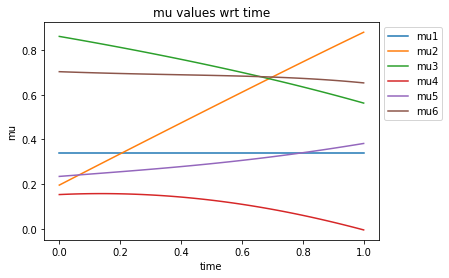

In [5]:
### Plot mu's
plt.plot(m.time,mu1.value,label='mu1')
plt.plot(m.time,mu2.value,label='mu2')
plt.plot(m.time,mu3.value,label='mu3')
plt.plot(m.time,mu4.value,label='mu4')
plt.plot(m.time,mu5.value,label='mu5')
plt.plot(m.time,mu6.value,label='mu6')
plt.xlabel('time')
plt.ylabel('mu')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('mu values wrt time')
plt.show()

In [6]:
### Solve for stability (Jacobian)

# define variables
# initial conditions M(0)=I, J(0)=0
M11 = m.Var(value=1) # 1           
M12 = m.Var(value=0)  
M13 = m.Var(value=0)           
M14 = m.Var(value=0)  
M15 = m.Var(value=0)           
M16 = m.Var(value=0)     
M21 = m.Var(value=0)           
M22 = m.Var(value=1) # 1  
M23 = m.Var(value=0)           
M24 = m.Var(value=0)  
M25 = m.Var(value=0)           
M26 = m.Var(value=0)     
M31 = m.Var(value=0)           
M32 = m.Var(value=0)  
M33 = m.Var(value=1) # 1           
M34 = m.Var(value=0)  
M35 = m.Var(value=0)           
M36 = m.Var(value=0)     
M41 = m.Var(value=0)           
M42 = m.Var(value=0)  
M43 = m.Var(value=0)           
M44 = m.Var(value=1) # 1  
M45 = m.Var(value=0)           
M46 = m.Var(value=0)     
M51 = m.Var(value=0)           
M52 = m.Var(value=0)  
M53 = m.Var(value=0)           
M54 = m.Var(value=0)  
M55 = m.Var(value=1) # 1            
M56 = m.Var(value=0)     
M61 = m.Var(value=0)           
M62 = m.Var(value=0)  
M63 = m.Var(value=0)           
M64 = m.Var(value=0)  
M65 = m.Var(value=0)           
M66 = m.Var(value=1) # 1     

J11 = m.Var(value=0)           
J12 = m.Var(value=0)  
J13 = m.Var(value=0)           
J14 = m.Var(value=0)  
J15 = m.Var(value=0)           
J16 = m.Var(value=0) 
J21 = m.Var(value=0)           
J22 = m.Var(value=0)  
J23 = m.Var(value=0)           
J24 = m.Var(value=0)  
J25 = m.Var(value=0)           
J26 = m.Var(value=0) 
J31 = m.Var(value=0)           
J32 = m.Var(value=0)  
J33 = m.Var(value=0)           
J34 = m.Var(value=0)  
J35 = m.Var(value=0)           
J36 = m.Var(value=0) 
J41 = m.Var(value=0)           
J42 = m.Var(value=0)  
J43 = m.Var(value=0)           
J44 = m.Var(value=0)  
J45 = m.Var(value=0)           
J46 = m.Var(value=0) 
J51 = m.Var(value=0)           
J52 = m.Var(value=0)  
J53 = m.Var(value=0)           
J54 = m.Var(value=0)  
J55 = m.Var(value=0)           
J56 = m.Var(value=0) 
J61 = m.Var(value=0)           
J62 = m.Var(value=0)  
J63 = m.Var(value=0)           
J64 = m.Var(value=0)  
J65 = m.Var(value=0)           
J66 = m.Var(value=0)    

# define equations
m.Equation(M11.dt() == mu3*((c3**-1)-(c2**-1))*M21 + mu2*((c3**-1)-(c2**-1))*M31)
m.Equation(M12.dt() == mu3*((c3**-1)-(c2**-1))*M22 + mu2*((c3**-1)-(c2**-1))*M32)
m.Equation(M13.dt() == mu3*((c3**-1)-(c2**-1))*M23 + mu2*((c3**-1)-(c2**-1))*M33)
m.Equation(M14.dt() == mu3*((c3**-1)-(c2**-1))*M24 + mu2*((c3**-1)-(c2**-1))*M34)
m.Equation(M15.dt() == mu3*((c3**-1)-(c2**-1))*M25 + mu2*((c3**-1)-(c2**-1))*M35)
m.Equation(M16.dt() == mu3*((c3**-1)-(c2**-1))*M26 + mu2*((c3**-1)-(c2**-1))*M36)
m.Equation(M21.dt() == mu3*((c1**-1)-(c3**-1))*M11 + mu1*((c1**-1)-(c3**-1))*M31)
m.Equation(M22.dt() == mu3*((c1**-1)-(c3**-1))*M12 + mu1*((c1**-1)-(c3**-1))*M32)
m.Equation(M23.dt() == mu3*((c1**-1)-(c3**-1))*M13 + mu1*((c1**-1)-(c3**-1))*M33)
m.Equation(M24.dt() == mu3*((c1**-1)-(c3**-1))*M14 + mu1*((c1**-1)-(c3**-1))*M34)
m.Equation(M25.dt() == mu3*((c1**-1)-(c3**-1))*M15 + mu1*((c1**-1)-(c3**-1))*M35)
m.Equation(M26.dt() == mu3*((c1**-1)-(c3**-1))*M16 + mu1*((c1**-1)-(c3**-1))*M36)
m.Equation(M31.dt() == mu2*((c2**-1)-(c1**-1))*M11 + mu1*((c2**-1)-(c1**-1))*M21)
m.Equation(M32.dt() == mu2*((c2**-1)-(c1**-1))*M12 + mu1*((c2**-1)-(c1**-1))*M22)
m.Equation(M33.dt() == mu2*((c2**-1)-(c1**-1))*M13 + mu1*((c2**-1)-(c1**-1))*M23)
m.Equation(M34.dt() == mu2*((c2**-1)-(c1**-1))*M14 + mu1*((c2**-1)-(c1**-1))*M24)
m.Equation(M35.dt() == mu2*((c2**-1)-(c1**-1))*M15 + mu1*((c2**-1)-(c1**-1))*M25)
m.Equation(M36.dt() == mu2*((c2**-1)-(c1**-1))*M16 + mu1*((c2**-1)-(c1**-1))*M26)
m.Equation(M41.dt() == (-mu6/c2)*M21 + (mu5/c3)*M31 + (mu3/c3)*M51 + (-mu2*c2)*M61)
m.Equation(M42.dt() == (-mu6/c2)*M22 + (mu5/c3)*M32 + (mu3/c3)*M52 + (-mu2*c2)*M62)
m.Equation(M43.dt() == (-mu6/c2)*M23 + (mu5/c3)*M33 + (mu3/c3)*M53 + (-mu2*c2)*M63)
m.Equation(M44.dt() == (-mu6/c2)*M24 + (mu5/c3)*M34 + (mu3/c3)*M54 + (-mu2*c2)*M64)
m.Equation(M45.dt() == (-mu6/c2)*M25 + (mu5/c3)*M35 + (mu3/c3)*M55 + (-mu2*c2)*M65)
m.Equation(M46.dt() == (-mu6/c2)*M26 + (mu5/c3)*M36 + (mu3/c3)*M56 + (-mu2*c2)*M66)
m.Equation(M51.dt() == (mu6/c1)*M11 + (-mu4/c3)*M31 + (-mu3/c3)*M41 + (mu1/c1)*M61)
m.Equation(M52.dt() == (mu6/c1)*M12 + (-mu4/c3)*M32 + (-mu3/c3)*M42 + (mu1/c1)*M62)
m.Equation(M53.dt() == (mu6/c1)*M13 + (-mu4/c3)*M33 + (-mu3/c3)*M43 + (mu1/c1)*M63)
m.Equation(M54.dt() == (mu6/c1)*M14 + (-mu4/c3)*M34 + (-mu3/c3)*M44 + (mu1/c1)*M64)
m.Equation(M55.dt() == (mu6/c1)*M15 + (-mu4/c3)*M35 + (-mu3/c3)*M45 + (mu1/c1)*M65)
m.Equation(M56.dt() == (mu6/c1)*M16 + (-mu4/c3)*M36 + (-mu3/c3)*M46 + (mu1/c1)*M66)
m.Equation(M61.dt() == (-mu5/c1)*M11 + (mu4/c2)*M21 + (mu2/c2)*M41 + (-mu1/c1)*M51)
m.Equation(M62.dt() == (-mu5/c1)*M12 + (mu4/c2)*M22 + (mu2/c2)*M42 + (-mu1/c1)*M52)
m.Equation(M63.dt() == (-mu5/c1)*M13 + (mu4/c2)*M23 + (mu2/c2)*M43 + (-mu1/c1)*M53)
m.Equation(M64.dt() == (-mu5/c1)*M14 + (mu4/c2)*M24 + (mu2/c2)*M44 + (-mu1/c1)*M54)
m.Equation(M65.dt() == (-mu5/c1)*M15 + (mu4/c2)*M25 + (mu2/c2)*M45 + (-mu1/c1)*M55)
m.Equation(M66.dt() == (-mu5/c1)*M16 + (mu4/c2)*M26 + (mu2/c2)*M46 + (-mu1/c1)*M56)

m.Equation(J11.dt() == (c1**-1)*M11 + (mu3/c3)*J21 + (-mu2/c2)*J31)
m.Equation(J12.dt() == (c1**-1)*M12 + (mu3/c3)*J22 + (-mu2/c2)*J32)
m.Equation(J13.dt() == (c1**-1)*M13 + (mu3/c3)*J23 + (-mu2/c2)*J33)
m.Equation(J14.dt() == (c1**-1)*M14 + (mu3/c3)*J24 + (-mu2/c2)*J34)
m.Equation(J15.dt() == (c1**-1)*M15 + (mu3/c3)*J25 + (-mu2/c2)*J35)
m.Equation(J16.dt() == (c1**-1)*M16 + (mu3/c3)*J26 + (-mu2/c2)*J36)
m.Equation(J21.dt() == (c2**-1)*M21 + (-mu3/c3)*J11 + (mu1/c1)*J31)
m.Equation(J22.dt() == (c2**-1)*M22 + (-mu3/c3)*J12 + (mu1/c1)*J32)
m.Equation(J23.dt() == (c2**-1)*M23 + (-mu3/c3)*J13 + (mu1/c1)*J33)
m.Equation(J24.dt() == (c2**-1)*M24 + (-mu3/c3)*J14 + (mu1/c1)*J34)
m.Equation(J25.dt() == (c2**-1)*M25 + (-mu3/c3)*J15 + (mu1/c1)*J35)
m.Equation(J26.dt() == (c2**-1)*M26 + (-mu3/c3)*J16 + (mu1/c1)*J36)
m.Equation(J31.dt() == (c3**-1)*M31 + (mu2/c2)*J11 + (-mu1/c1)*J21)
m.Equation(J32.dt() == (c3**-1)*M32 + (mu2/c2)*J12 + (-mu1/c1)*J22)
m.Equation(J33.dt() == (c3**-1)*M33 + (mu2/c2)*J13 + (-mu1/c1)*J23)
m.Equation(J34.dt() == (c3**-1)*M34 + (mu2/c2)*J14 + (-mu1/c1)*J24)
m.Equation(J35.dt() == (c3**-1)*M35 + (mu2/c2)*J15 + (-mu1/c1)*J25)
m.Equation(J36.dt() == (c3**-1)*M36 + (mu2/c2)*J16 + (-mu1/c1)*J26)
m.Equation(J41.dt() == (mu3/c3)*J51 + (-mu2/c2)*J61)
m.Equation(J42.dt() == (mu3/c3)*J52 + (-mu2/c2)*J62)
m.Equation(J43.dt() == (mu3/c3)*J53 + (-mu2/c2)*J63)
m.Equation(J44.dt() == (mu3/c3)*J54 + (-mu2/c2)*J64)
m.Equation(J45.dt() == (mu3/c3)*J55 + (-mu2/c2)*J65)
m.Equation(J46.dt() == (mu3/c3)*J56 + (-mu2/c2)*J66)
m.Equation(J51.dt() == J31 + (-mu3/c3)*J41 + (mu1/c1)*J61)
m.Equation(J52.dt() == J32 + (-mu3/c3)*J42 + (mu1/c1)*J62)
m.Equation(J53.dt() == J33 + (-mu3/c3)*J43 + (mu1/c1)*J63)
m.Equation(J54.dt() == J34 + (-mu3/c3)*J44 + (mu1/c1)*J64)
m.Equation(J55.dt() == J35 + (-mu3/c3)*J45 + (mu1/c1)*J65)
m.Equation(J56.dt() == J36 + (-mu3/c3)*J46 + (mu1/c1)*J66)
m.Equation(J61.dt() == -J21 + (mu2/c2)*J41 + (-mu1/c1)*J51)
m.Equation(J62.dt() == -J22 + (mu2/c2)*J42 + (-mu1/c1)*J52)
m.Equation(J63.dt() == -J23 + (mu2/c2)*J43 + (-mu1/c1)*J53)
m.Equation(J64.dt() == -J24 + (mu2/c2)*J44 + (-mu1/c1)*J54)
m.Equation(J65.dt() == -J25 + (mu2/c2)*J45 + (-mu1/c1)*J55)
m.Equation(J66.dt() == -J26 + (mu2/c2)*J46 + (-mu1/c1)*J56)

# solve equations
m.options.IMODE=4
m.solve(disp=False)

# solve for determinant of Jacobian
J = np.array([[J11, J12, J13, J14, J15, J16],[J21, J22, J23, J24, J25, J26],[J31, J32, J33, J34, J35, J36],[J41, J42, J43, J44, J45, J46],[J51, J52, J53, J54, J55, J56],[J61, J62, J63, J64, J65, J66]])
stable = True 
for i in range(t_steps): # for each time step
  det_J = np.linalg.det(J[:,:,i])
  if det_J == 0:
    stable = False
    print("Configuration is NOT stable")
    break

if stable:
  print("Configuration is stable")

Configuration is NOT stable


In [7]:
### Solve for q's

# define variables
# initial condition q(0) = I
q11 = m.Var(value = 1.0)
q12 = m.Var(value = 0.0)
q13 = m.Var(value = 0.0)
q14 = m.Var(value = 0.0)
q21 = m.Var(value = 0.0)
q22 = m.Var(value = 1.0)
q23 = m.Var(value = 0.0)
q24 = m.Var(value = 0.0)
q31 = m.Var(value = 0.0)
q32 = m.Var(value = 0.0)
q33 = m.Var(value = 1.0)
q34 = m.Var(value = 0.0)
q41 = m.Var(value = 0.0)
q42 = m.Var(value = 0.0)
q43 = m.Var(value = 0.0)
q44 = m.Var(value = 1.0)

# define equations
m.Equation(q11.dt() == q12*(mu3/c3) - q13*(mu2/c2))
m.Equation(q21.dt() == q22*(mu3/c3) - q23*(mu2/c2))
m.Equation(q31.dt() == q32*(mu3/c3) - q33*(mu2/c2))
m.Equation(q41.dt() == q42*(mu3/c3) - q43*(mu2/c2))
m.Equation(q12.dt() == -q12*(mu3/c3) + q14*(mu1/c1))
m.Equation(q22.dt() == -q22*(mu3/c3) + q24*(mu1/c1))
m.Equation(q32.dt() == -q32*(mu3/c3) + q34*(mu1/c1))
m.Equation(q42.dt() == -q42*(mu3/c3) + q44*(mu1/c1))
m.Equation(q13.dt() == q11*(mu2/c2) - q12*(mu1/c1))
m.Equation(q23.dt() == q21*(mu2/c2) - q22*(mu1/c1))
m.Equation(q33.dt() == q31*(mu2/c2) - q32*(mu1/c1))
m.Equation(q43.dt() == q41*(mu2/c2) - q42*(mu1/c1))
m.Equation(q14.dt() == q11)
m.Equation(q24.dt() == q21)
m.Equation(q34.dt() == q31)
m.Equation(q44.dt() == q41)

# solve equations
m.options.IMODE=4
m.solve(disp=False)

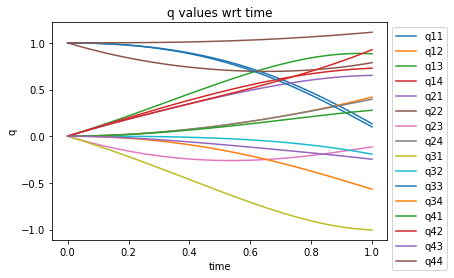

In [9]:
### Plot q's
plt.plot(m.time,q11.value,label='q11')
plt.plot(m.time,q12.value,label='q12')
plt.plot(m.time,q13.value,label='q13')
plt.plot(m.time,q14.value,label='q14')
plt.plot(m.time,q21.value,label='q21')
plt.plot(m.time,q22.value,label='q22')
plt.plot(m.time,q23.value,label='q23')
plt.plot(m.time,q24.value,label='q24')
plt.plot(m.time,q31.value,label='q31')
plt.plot(m.time,q32.value,label='q32')
plt.plot(m.time,q33.value,label='q33')
plt.plot(m.time,q34.value,label='q34')
plt.plot(m.time,q41.value,label='q41')
plt.plot(m.time,q42.value,label='q42')
plt.plot(m.time,q43.value,label='q43')
plt.plot(m.time,q44.value,label='q44')
plt.xlabel('time')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('q values wrt time')
plt.show()


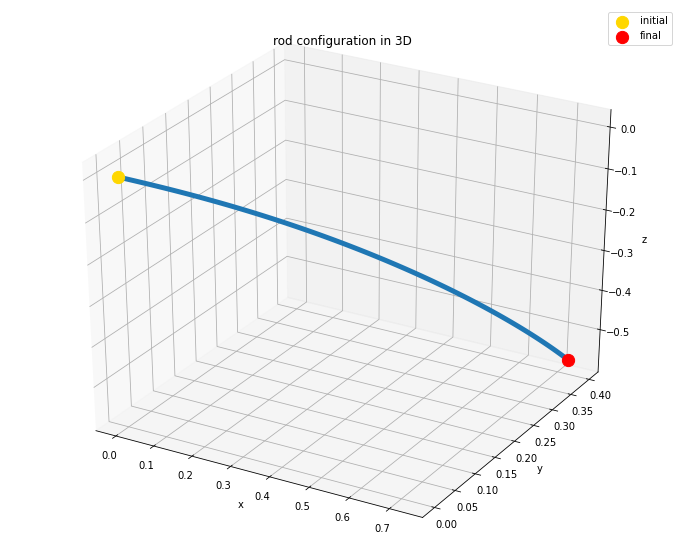

a = 0.3371367304432906 0.19574592020453763 0.8607867698226778 0.15345951766172938 0.234634702989032 0.7030188660436335
b = 0.72819754377 0.39620752153 -0.56795647829


In [10]:
### Interpret final q's
x = [q14[i] for i in range(t_steps)]
y = [q24[i] for i in range(t_steps)]
z = [q34[i] for i in range(t_steps)]

# 3D plot
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')
ax.plot3D(x, y, z, linewidth=5)
ax.scatter(x[0], y[0], z[0], marker='o', s=150, color='gold', label='initial')
ax.scatter(x[-1], y[-1], z[-1], marker='o', s=150, color='red', label='final')
ax.set_title('rod configuration in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

# Print
print('a =', a[0], a[1], a[2], a[3], a[4], a[5])
print('b =', q14[-1], q24[-1], q34[-1])